In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

load data and get info

In [2]:
card=pd.read_csv('/content/creditcard.csv')

In [3]:
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
card.shape

(27819, 31)

In [5]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27819 entries, 0 to 27818
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    27819 non-null  int64  
 1   V1      27818 non-null  float64
 2   V2      27818 non-null  float64
 3   V3      27818 non-null  float64
 4   V4      27818 non-null  float64
 5   V5      27818 non-null  float64
 6   V6      27818 non-null  float64
 7   V7      27818 non-null  float64
 8   V8      27818 non-null  float64
 9   V9      27818 non-null  float64
 10  V10     27818 non-null  float64
 11  V11     27818 non-null  float64
 12  V12     27818 non-null  float64
 13  V13     27818 non-null  float64
 14  V14     27818 non-null  float64
 15  V15     27818 non-null  float64
 16  V16     27818 non-null  float64
 17  V17     27818 non-null  float64
 18  V18     27818 non-null  float64
 19  V19     27818 non-null  float64
 20  V20     27818 non-null  float64
 21  V21     27818 non-null  float64
 22

In [6]:
card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,27819.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,...,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000,27818.000000
mean,20434.634315,-0.217255,0.149360,0.723559,0.221251,-0.199312,0.084607,-0.125687,0.028612,0.394412,...,-0.035045,-0.126646,-0.041207,0.010602,0.129963,0.023506,0.013398,0.004055,77.297298,0.003343
std,11866.057310,1.866645,1.545773,1.648474,1.425213,1.431480,1.325535,1.308413,1.314408,1.262314,...,0.803370,0.642121,0.544077,0.590914,0.436275,0.513862,0.393823,0.278450,219.651476,0.057724
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,9037.500000,-0.951060,-0.424408,0.271315,-0.690871,-0.788013,-0.658281,-0.595865,-0.162449,-0.420660,...,-0.246695,-0.547732,-0.174773,-0.326892,-0.132690,-0.336775,-0.063637,-0.008436,6.442500,0.000000
50%,24675.000000,-0.259642,0.163461,0.855090,0.202149,-0.230110,-0.174349,-0.068385,0.032587,0.305709,...,-0.093654,-0.100015,-0.049634,0.063056,0.169235,-0.054798,0.008119,0.020201,19.950000,0.000000
75%,31319.000000,1.166130,0.803933,1.483404,1.102574,0.316960,0.471794,0.445844,0.290104,1.152587,...,0.079173,0.281732,0.075486,0.398937,0.412015,0.305465,0.091483,0.076658,69.507500,0.000000
max,34712.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [7]:

card.isna().sum()


,0
Time,0
V1,1
V2,1
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


Data Analysis

In [8]:
card['Class'].value_counts()

,count
Class,
0.0,27725
1.0,93


<Axes: xlabel='Class'>

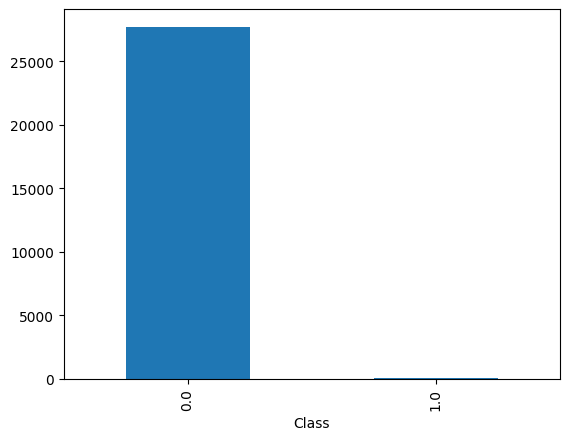

In [9]:
card['Class'].value_counts().plot(kind='bar')

In [10]:
fraud=card[card.Class == 1]
normal=card[card.Class == 0]

In [11]:
card.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,20440.754518,-0.190595,0.129284,0.765200,0.201632,-0.180681,0.092904,-0.099318,0.014884,0.405538,...,0.041673,-0.037007,-0.125822,-0.040202,0.011510,0.129192,0.022983,0.010650,0.003732,77.232517
1.0,18829.451613,-8.165086,6.134379,-11.690379,6.070066,-5.753486,-2.388962,-7.986805,4.121062,-2.922478,...,0.697894,0.549621,-0.372248,-0.340859,-0.260055,0.359772,0.179521,0.832824,0.100500,96.609677


In [12]:
fraud.Amount.describe()

,Amount
count,93.000000
mean,96.609677
std,259.128010
min,0.000000
25%,1.000000
50%,1.100000
75%,99.990000
max,1809.680000


In [13]:
normal.Amount.describe()

,Amount
count,27725.000000
mean,77.232517
std,219.509762
min,0.000000
25%,6.490000
50%,19.950000
75%,69.320000
max,7879.420000


Under-Sampling

In [14]:
normal_sample = normal.sample(n=492)

In [15]:
new_data = pd.concat([normal_sample, fraud], axis=0)

In [16]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
584,438,1.491574,-1.088278,0.552852,-1.289876,-1.391175,-0.101768,-1.156643,-0.023064,-1.706012,...,-0.224231,0.008611,-0.090743,0.045121,0.593903,-0.100271,0.052103,0.004537,2.00,0.0
12583,22043,1.031579,0.059022,0.865832,1.254057,-0.483309,-0.056932,-0.367350,0.130718,1.383528,...,-0.122079,-0.245266,0.059869,0.103570,0.208118,-0.533921,0.005393,0.018657,49.00,0.0
27384,34530,-0.822312,0.887025,1.383814,-1.173412,-0.474229,-0.801633,0.464501,-0.797304,-0.512684,...,0.211645,0.787572,-0.154143,0.426382,-0.439700,-0.330037,-0.640875,-0.166932,2.95,0.0
23892,32973,-0.776133,1.004162,1.959692,1.192430,0.490413,-0.235010,1.093080,-0.514623,-0.192421,...,0.012981,0.363370,-0.404600,0.413809,0.394300,-0.164909,-0.678134,-0.316655,1.00,0.0
15696,27124,-1.794172,-1.136302,1.986137,0.214567,1.393705,-1.500460,-0.682636,0.323410,0.087396,...,0.189857,0.130808,0.063537,0.546709,0.116376,0.258626,-0.009247,0.126468,1.00,0.0


In [17]:
new_data['Class'].value_counts()

,count
Class,
0.0,492
1.0,93


In [18]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,20384.886179,-0.233260,0.200265,0.682419,0.285858,-0.185226,0.022151,-0.054073,0.040980,0.428228,...,0.036123,-0.078910,-0.115255,-0.076302,-0.014731,0.138753,0.009305,0.038568,-0.015136,78.857500
1.0,18829.451613,-8.165086,6.134379,-11.690379,6.070066,-5.753486,-2.388962,-7.986805,4.121062,-2.922478,...,0.697894,0.549621,-0.372248,-0.340859,-0.260055,0.359772,0.179521,0.832824,0.100500,96.609677


Build Model

In [19]:
x = new_data.drop(columns='Class', axis=1)
y = new_data['Class']

In [20]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
584,438,1.491574,-1.088278,0.552852,-1.289876,-1.391175,-0.101768,-1.156643,-0.023064,-1.706012,...,-0.294562,-0.224231,0.008611,-0.090743,0.045121,0.593903,-0.100271,0.052103,0.004537,2.00
12583,22043,1.031579,0.059022,0.865832,1.254057,-0.483309,-0.056932,-0.367350,0.130718,1.383528,...,-0.191668,-0.122079,-0.245266,0.059869,0.103570,0.208118,-0.533921,0.005393,0.018657,49.00
27384,34530,-0.822312,0.887025,1.383814,-1.173412,-0.474229,-0.801633,0.464501,-0.797304,-0.512684,...,0.572044,0.211645,0.787572,-0.154143,0.426382,-0.439700,-0.330037,-0.640875,-0.166932,2.95
23892,32973,-0.776133,1.004162,1.959692,1.192430,0.490413,-0.235010,1.093080,-0.514623,-0.192421,...,0.059696,0.012981,0.363370,-0.404600,0.413809,0.394300,-0.164909,-0.678134,-0.316655,1.00
15696,27124,-1.794172,-1.136302,1.986137,0.214567,1.393705,-1.500460,-0.682636,0.323410,0.087396,...,0.221797,0.189857,0.130808,0.063537,0.546709,0.116376,0.258626,-0.009247,0.126468,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26802,34256,0.539276,1.554890,-2.066180,3.241617,0.184736,0.028330,-1.515521,0.537035,-1.999846,...,0.302735,0.371773,0.111955,-0.305225,-1.053835,0.771175,0.240878,0.418435,0.232170,19.02
27362,34521,1.081234,0.416414,0.862919,2.520863,-0.005021,0.563341,-0.123372,0.223122,-0.673598,...,-0.165249,-0.159387,-0.305154,0.053620,0.011761,0.375146,-0.106299,0.021008,0.010559,1.52
27627,34634,0.333499,1.699873,-2.596561,3.643945,-0.585068,-0.654659,-2.275789,0.675229,-2.042416,...,0.329342,0.469212,-0.144363,-0.317981,-0.769644,0.807855,0.228164,0.551002,0.305473,18.96
27738,34684,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,...,0.513530,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,125.30


In [21]:
y

,Class
584,0.0
12583,0.0
27384,0.0
23892,0.0
15696,0.0
...,...
26802,1.0
27362,1.0
27627,1.0
27738,1.0


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=11)

In [23]:
model = LogisticRegression()

In [24]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
train_prediction = model.predict(x_train)
training_accuracy = accuracy_score(train_prediction, y_train)


In [26]:
training_accuracy

0.9764957264957265

In [27]:
test_prediction = model.predict(x_test)
testing_accuracy = accuracy_score(test_prediction, y_test)

In [28]:
testing_accuracy

0.9658119658119658